# CLASSIFICATION  - ASSIGNMENT - 3 - "Click on Ad Prediction"

In this assignment, you will be working with a dummy advertising data set, which indicates whether an internet user clicked on an advertisement on a company website. Create a model that will predict whether a user will click on an ad based on the profile of that user.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn import metrics

In [2]:
data = pd.read_csv("advertising.csv")
data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [3]:
data.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

In [4]:
data.tail()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00,1
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01,1
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57,1
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54,0
999,45.01,26,29875.80,178.35,Virtual 5thgeneration emulation,Ronniemouth,0,Brazil,2016-06-03 21:43:21,1


In [5]:
data.shape

(1000, 10)

In [6]:
data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [7]:
data.median()

Daily Time Spent on Site       68.215
Age                            35.000
Area Income                 57012.300
Daily Internet Usage          183.130
Male                            0.000
Clicked on Ad                   0.500
dtype: float64

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


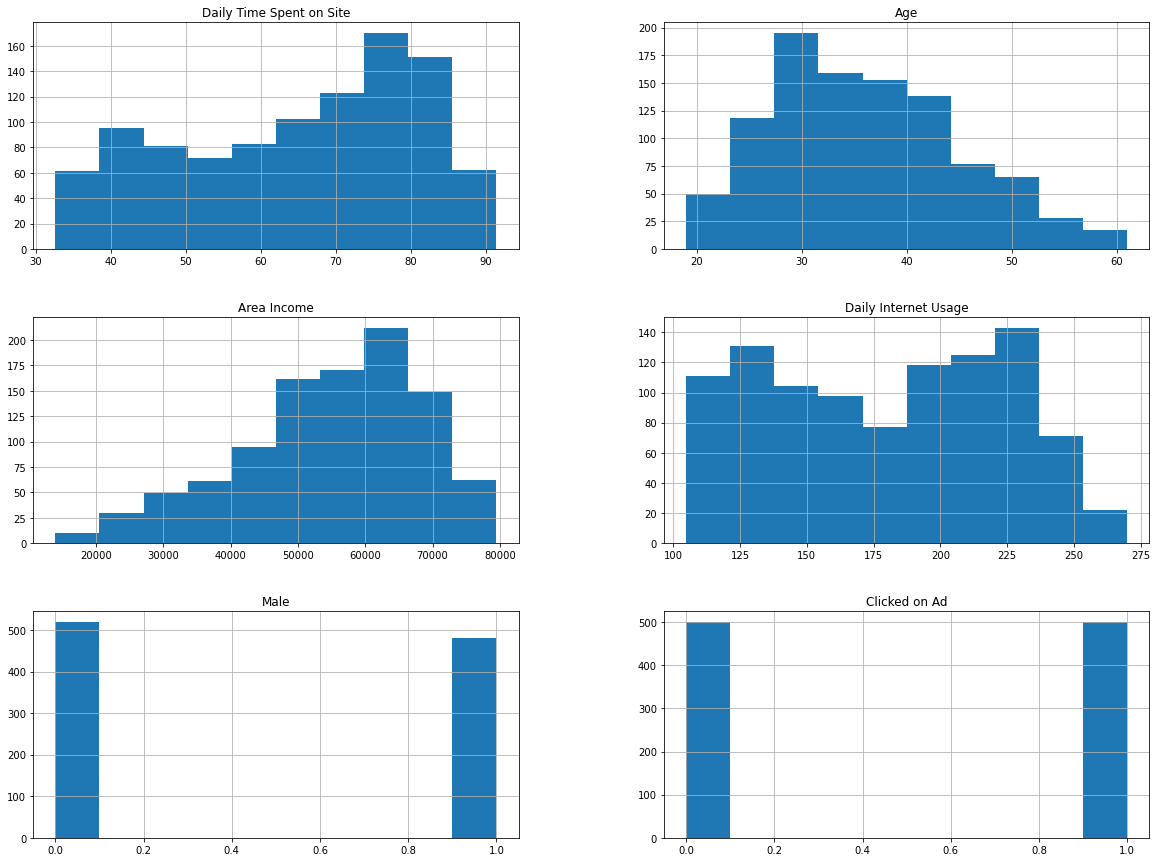

In [9]:
data.hist(figsize=(20, 15))
plt.show()

### Checking for duplicated , missing values or no-entries

<AxesSubplot:>

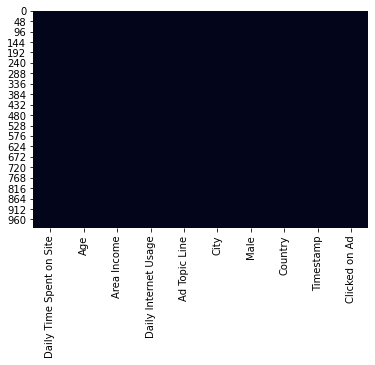

In [10]:
sns.heatmap(data.isnull(), cbar=False)

In [11]:
data.isna().any().any()

False

In [12]:
data.loc[:, data.isnull().any()].columns

Index([], dtype='object')

In [13]:
len(data[data.duplicated()])
# total number of duplicate values in the "data"

0

### Checking corelation

<AxesSubplot:>

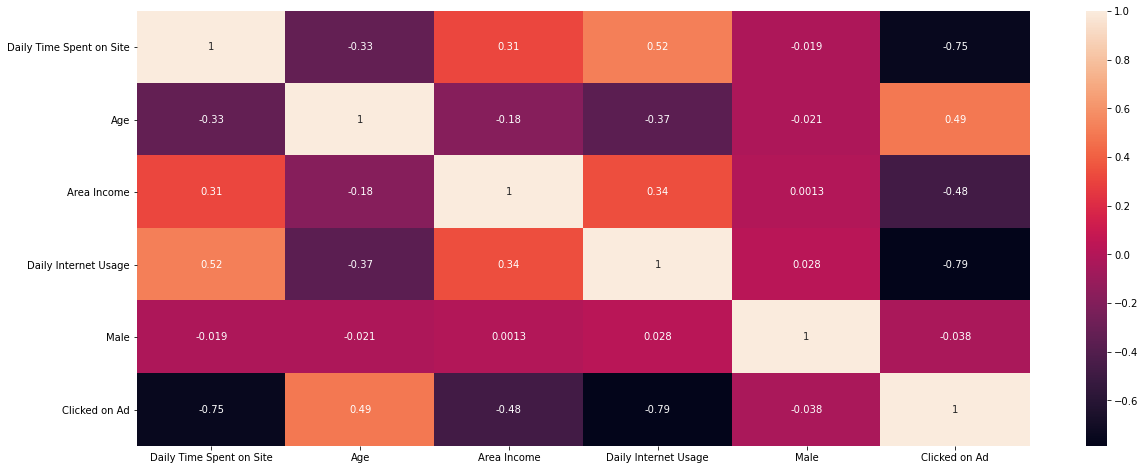

In [14]:
corelation = data.corr()
plt.rcParams['figure.figsize'] = [20,8]
sns.heatmap(corelation,xticklabels = corelation.columns,yticklabels= corelation.columns,annot = True)

Looking at the No. of unique values,

In [15]:
len(data['Ad Topic Line'].unique())

1000

In [16]:
len(data['City'].unique())

969

In [17]:
len(data['Country'].unique())

237

we can see that the number of unique values are a large part of the total values or equal to the total values in the columns in some cases.  Which doesnt provide much information to the outcome so this column can be dropped 

In [18]:
len(data['Timestamp'].unique())

1000

In [19]:
data['Timestamp_year']=pd.DatetimeIndex(data['Timestamp']).year

In [20]:
data['Timestamp_month']=pd.DatetimeIndex(data['Timestamp']).month

In [21]:
data['Timestamp_day']=pd.DatetimeIndex(data['Timestamp']).day

In [25]:
data['Timestamp_hour'] = pd.DatetimeIndex(data['Timestamp']).hour

<AxesSubplot:xlabel='Timestamp_hour', ylabel='Count'>

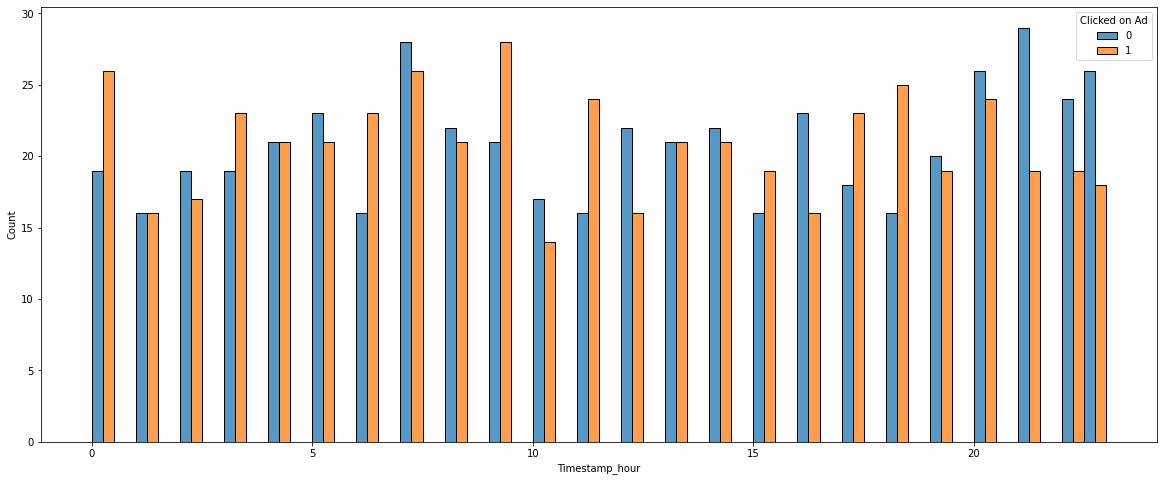

In [38]:
sns.histplot(x=data['Timestamp_hour'],hue = data["Clicked on Ad"], multiple='dodge',bins = 24,binwidth = 0.5)

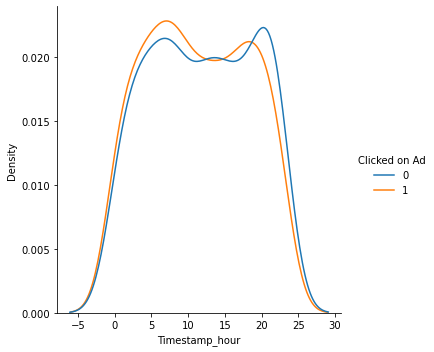

In [46]:
sns.displot(data,x=data['Timestamp_hour'],hue = data["Clicked on Ad"], kind="kde")

In [43]:
data['Timestamp_day'].unique()

array([27,  4, 13, 10,  3, 19, 28,  7, 18, 11, 16,  8, 20, 24,  9, 30,  2,
        5, 23, 14,  1, 15, 12, 17, 26, 25, 31, 22,  6, 21, 29],
      dtype=int64)

In [ ]:
day = data['Timestamp_day']

In [40]:
data['Timestamp_month'].unique()

array([3, 4, 1, 6, 5, 7, 2], dtype=int64)

<AxesSubplot:xlabel='Timestamp_month', ylabel='Count'>

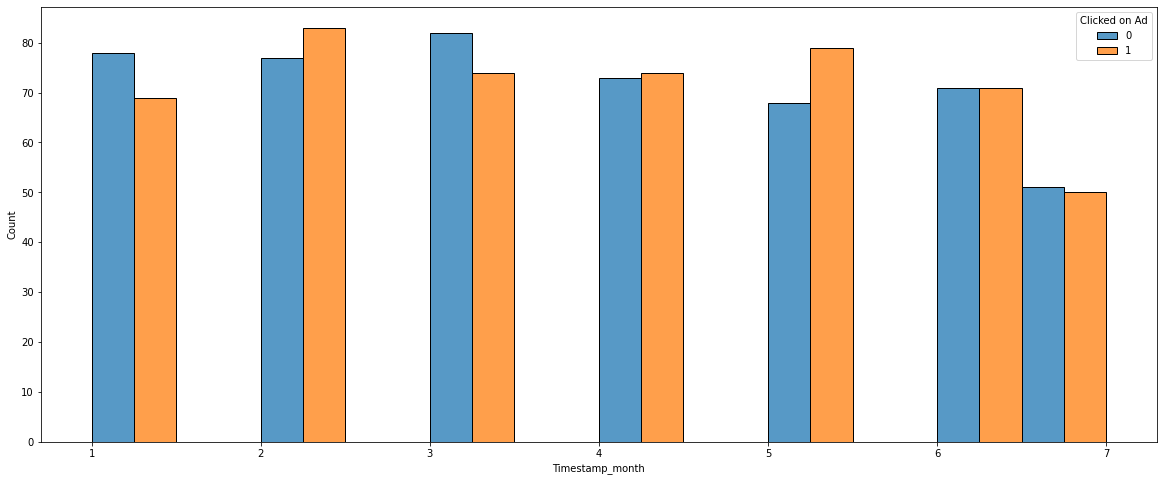

In [39]:
sns.histplot(x=data['Timestamp_month'],hue = data["Clicked on Ad"], multiple='dodge',bins = 12, binwidth = 0.5)

In [ ]:
data.head()

In [ ]:
data = data.drop(['Timestamp'],axis = 1)

In [ ]:
data.columns

In [ ]:
feature_cols = ['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage', 'Male', 'Timestamp_year', 'Timestamp_month', 'Timestamp_day']
x = data[feature_cols]
y = data['Clicked on Ad']

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state = 44,stratify = y)

In [ ]:
classifier = DecisionTreeClassifier()
classifier = classifier.fit(x_train, y_train)

In [ ]:
y_pred = classifier.predict(x_test)

## BUILD A PRELIMINARY TREE

In [ ]:
plt.figure(figsize=(15,7.5))
plot_tree(classifier,filled = True,rounded = True,class_names = ["0","1"], feature_names=feature_cols)

In [ ]:
classifier.get_depth()

In [ ]:
plot_confusion_matrix(classifier,x_test,y_test, display_labels=["Didn't click on the Ad","Clicked on Ad"])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

In [ ]:
print('Accuracy: ',metrics.accuracy_score(y_test,y_pred))

## COST COMPLEXITY PRUNING

In [ ]:
path = classifier.cost_complexity_pruning_path(x_train,y_train)
ccp_alphas = path.ccp_alphas
ccp_alphas = ccp_alphas[:-1]
classifiers=[]
for ccp_alpha in ccp_alphas:
    classifier = DecisionTreeClassifier(ccp_alpha = ccp_alpha)
    classifier.fit(x_train,y_train)
    classifiers.append(classifier)

In [ ]:
ccp_alphas

In [ ]:
train_scores = [classifier.score(x_train,y_train) for classifier in classifiers]
test_scores = [classifier.score(x_test, y_test) for classifier in classifiers]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha")
ax.plot(ccp_alphas, train_scores, marker = 'o', label = "train", drawstyle = "steps-post")
ax.plot(ccp_alphas, test_scores, marker = 'o', label = 'test', drawstyle = 'steps-post')
ax.legend()
plt.show()

## AFTER PRUNING THE TREE

In [ ]:
ccp_alphas[(ccp_alphas > 0.009)&(ccp_alphas < 0.02)]

In [ ]:
classifier = DecisionTreeClassifier(random_state=0, ccp_alpha= 0.01069074)
classifier.fit(x_train,y_train)

In [ ]:
y_pred=classifier.predict(x_test)

In [ ]:
print('Accuracy: ',metrics.accuracy_score(y_test,y_pred))

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)
print(confusion_matrix(y_test,y_pred))

In [ ]:
plot_confusion_matrix(classifier,x_test,y_test, display_labels=["Didn't click on the Ad","Clicked on Ad"])

In [ ]:
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(classifier, out_file=dot_data, feature_names=feature_cols, 
               class_names=['0','1'], filled=True, leaves_parallel=False, impurity=True, node_ids=False, 
               proportion=False, rotate=False, rounded=True, special_characters=True, precision=3)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('advertising.png')
Image(graph.create_png())

In [ ]:
classifier.get_depth()

## STRATIFIED CROSS-VALIDATION ACCURACY

In [ ]:
from sklearn import model_selection
skfold = model_selection.StratifiedKFold(n_splits=6)
results_train_skfold = model_selection.cross_val_score(classifier, x, y, cv=skfold)
print('Accuracy: ',results_train_skfold.mean()*100)